In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Embedding,Dropout,LSTM
from keras.callbacks import EarlyStopping
from keras.models import Sequential 
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import warnings
import numpy as np

In [ ]:
warnings.filterwarnings("ignore")

import pandas as pd


url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_table(url, header=None, names=['label', 'message'])


X = df['message']
y = df['label']

In [5]:
X.shape

(5572,)

In [6]:
X[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
tokenizer=Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X)
x_sequances=tokenizer.texts_to_sequences(X)
x_padded=pad_sequences(x_sequances,maxlen=100)
print("sayisallaştirilmis x_sequances: ",x_sequances[0],"\npad eklenmis x_padded:\n",x_padded[0])

sayisallaştirilmis x_sequances:  [49, 471, 4436, 842, 755, 658, 64, 8, 1327, 88, 123, 351, 1328, 148, 2997, 1329, 67, 58, 4437, 144] 
pad eklenmis x_padded:
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0   49  471 4436  842
  755  658   64    8 1327   88  123  351 1328  148 2997 1329   67   58
 4437  144]


In [10]:
y[0]

'ham'

In [11]:
encoder=LabelEncoder()
print(y[0])
y=1-encoder.fit_transform(y)
print(y[0])

ham
1


In [12]:
x_train,x_test,y_train,y_test=train_test_split(x_padded,y,test_size=0.2,random_state=42)
x_train.shape

(4457, 100)

In [24]:
def build_model():
    
    model=Sequential()
    model.add(Embedding(input_dim=10000,output_dim=64,input_shape=(100,)))
    model.add(LSTM(units=64,return_sequences=False))
    
    model.add(Dropout(0.3))
    model.add(Dense(1,activation="sigmoid"))
    model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
    return model

In [25]:
model=build_model()
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 100, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673,089 (2.57 MB)

 Trainable params: 673,089 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
earlystop=EarlyStopping(monitor="val_loss",restore_best_weights=True,patience=3)

history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=32,callbacks=[earlystop])


Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - accuracy: 0.8885 - loss: 0.3140 - val_accuracy: 0.9839 - val_loss: 0.0598
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9893 - loss: 0.0456 - val_accuracy: 0.9919 - val_loss: 0.0357
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9968 - loss: 0.0130 - val_accuracy: 0.9919 - val_loss: 0.0344
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.9982 - loss: 0.0058 - val_accuracy: 0.9910 - val_loss: 0.0399
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 78ms/step - accuracy: 0.9993 - loss: 0.0022 - val_accuracy: 0.9928 - val_loss: 0.0399
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.9997 - loss: 0.0017 - val_accuracy: 0.9937 - val_loss: 0.0422


In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix
loss,acc=model.evaluate(x_test,y_test)
print("test kaybi: ",loss," test dogruluk orani:",acc)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9893 - loss: 0.0408
test kaybi:  0.03438126668334007  test dogruluk orani: 0.9919282793998718


In [32]:
y_pred=model.predict(x_test)
y_pred=(y_pred>0.5).astype("int32")
print("model test acc: ",accuracy_score(y_test,y_pred))

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
model test acc:  0.9919282511210762


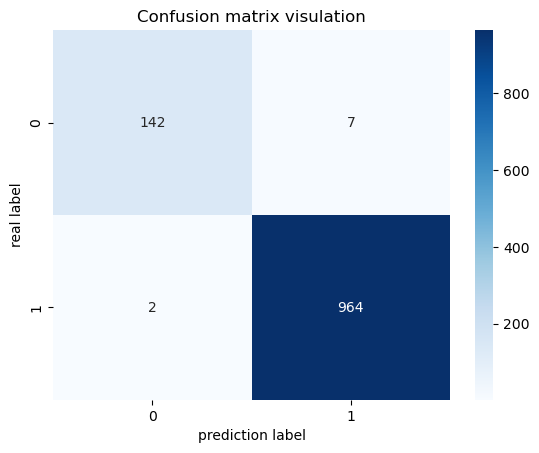

In [36]:
cm=confusion_matrix(y_test,y_pred)
import seaborn as sns
plt.plot()
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d")
plt.title("Confusion matrix visulation")
plt.xlabel("prediction label")
plt.ylabel("real label")
plt.show()
